In [9]:
import csv
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

In [10]:
DS = pd.read_csv("ObjectSubset150SentenceLength.csv")

In [12]:
DS['tag'].fillna('text', inplace=True)

In [13]:
DS.head()

,text_ID,word,tag
0,46809,RR,object
1,46809,130/80,object
2,46809,mmHg.,text
3,47482,"RR142/89mmHg,",object
4,47482,HR,text


In [14]:
words = list(set(DS["word"].values))
n_words = len(words);n_words

27741

In [15]:
tags = list(set(DS["tag"].values))
n_tags = len(tags); n_tags


2

In [16]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("text_ID").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [17]:
getter = SentenceGetter(DS)

In [18]:
sentences = getter.sentences

In [19]:
len(sentences)

13643

In [43]:
sentences[1]

[('Pt.', 'text'),
 ('tehtud', 'text'),
 ('3', 'text'),
 ('plasmaferees,', 'text'),
 ('talus', 'text'),
 ('hästi.', 'text'),
 ('Eemaldatud', 'text'),
 ('700', 'text'),
 ('ml', 'text'),
 ('plasmat.', 'text'),
 ('RR', 'object'),
 ('112/60', 'object'),
 ('mmHg.', 'text'),
 ('Tgasi', 'text'),
 ('22.10.09.', 'text')]

In [34]:
max_len = 150
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0


In [35]:
X = [[w[0] for w in s] for s in sentences]


In [36]:
new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PAD")
    new_X.append(new_seq)
X = new_X

In [48]:
print(X[1])

['Pt.', 'tehtud', '3', 'plasmaferees,', 'talus', 'hästi.', 'Eemaldatud', '700', 'ml', 'plasmat.', 'RR', '112/60', 'mmHg.', 'Tgasi', '22.10.09.', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', '

In [49]:
y = [[tag2idx[w[1]] for w in s] for s in sentences]


In [50]:
from keras.preprocessing.sequence import pad_sequences
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["PAD"], truncating='post')


In [51]:
tag2idx

{'object': 1, 'text': 2, 'PAD': 0}

In [52]:
idx2tag = {i: w for w, i in tag2idx.items()}

In [53]:
idx2tag

{1: 'object', 2: 'text', 0: 'PAD'}

In [54]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=2018)


In [60]:
X_tr[1]

['Funktsionaaldiagnostilised',
 'EKG',
 'Vastus',
 'Tervishoiu',
 'Pildipangas',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',

In [56]:
batch_size = 32


In [57]:
# import tensorflow.compat.v1 as tf
# from keras import backend as K

# # import tensorflow_hub as hub
# # from keras import backend as K
# # sess = tf.Session()

# # init = tf.global_variables_initializer() # This reinitializes keras weights, so must be put before Keras loading
# sess.run(init)
# sess.run(tf.global_variables_initializer())
# K.set_session(sess)

import tensorflow as tf
import tensorflow_hub as hub
from keras import backend as K


In [25]:
# sess = tf.Session()
# K.set_session(sess)


In [58]:
from allennlp.modules.elmo import Elmo, batch_to_ids
options_file = "options.json"
weight_file = "swb_weights.hdf5"
elmo_model  = Elmo(options_file, weight_file, 2, dropout=0)


In [59]:
# from keras.models import Model, Input
# from keras.layers.merge import add
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda


In [59]:
X_tr_character_ids = batch_to_ids(X_tr)
X_tr_embeddings = elmo_model(X_tr_character_ids)

X_te_character_ids = batch_to_ids(X_te)
X_te_embeddings = elmo_model(X_te_character_ids)

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 10617139200 bytes. Buy new RAM!


In [47]:
# sess.run(tf.compat.v1.global_variables_initializer())
# sess.run(tf.compat.v1.tables_initializer())
# def ElmoEmbedding(x):
#     return elmo_model(inputs={
#                             "tokens": tf.squeeze(tf.cast(x, tf.string)),
#                             "sequence_len": tf.constant(batch_size*[max_len])
#                       },
# #                       signature="tokens",
#                       as_dict=True)["elmo"]

# from keras.models import Model, Input
# from keras.layers.merge import add
# from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda

# input_text = Input(shape=(max_len,), dtype=tf.string)
# embedding = Lambda(ElmoEmbedding, output_shape=(None, 1024))(input_text)
# x = Bidirectional(LSTM(units=512, return_sequences=True,
#                        recurrent_dropout=0.2, dropout=0.2))(embedding)
# x_rnn = Bidirectional(LSTM(units=512, return_sequences=True,
#                            recurrent_dropout=0.2, dropout=0.2))(x)
# x = add([x, x_rnn])  # residual connection to the first biLSTM
# out = TimeDistributed(Dense(n_tags, activation="softmax"))(x)


In [57]:
X_tr_embeddings["elmo_representations"][1].shape

torch.Size([8323, 10, 1024])

In [ ]:
y_tr.shape

In [104]:
from keras.models import Sequential
from keras.layers import LSTM, core, Activation, Dense
import numpy as np
from keras.layers import Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D


model = Sequential()
# model.add(TimeDistributed(LSTM(units=20,input_shape=(10, 1024), return_sequences=False,
#                                 recurrent_dropout=0.5)))

# # main LSTM
# model.add(SpatialDropout1D(0.3))

model.add(Bidirectional(LSTM(50, input_shape=(10, 1024), return_sequences=True,recurrent_dropout=0.5)))

model.add(TimeDistributed(Dense(3, activation='softmax')))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


In [105]:
history = model.fit(X_tr_embeddings['elmo_representations'][1].detach().numpy(), y_tr.reshape(y_tr.shape[0],10,1),validation_split=0.1 ,verbose=1,epochs=10,batch_size=32)

Train on 7490 samples, validate on 833 samples
Epoch 1/5
7490/7490 [==============================] - 5s 734us/step - loss: 0.1576 - accuracy: 0.9450 - val_loss: 0.1382 - val_accuracy: 0.9537
Epoch 2/5
7490/7490 [==============================] - 5s 623us/step - loss: 0.1069 - accuracy: 0.9597 - val_loss: 0.1266 - val_accuracy: 0.9527
Epoch 3/5
7490/7490 [==============================] - 5s 616us/step - loss: 0.0910 - accuracy: 0.9645 - val_loss: 0.1247 - val_accuracy: 0.9533
Epoch 4/5
7490/7490 [==============================] - 5s 609us/step - loss: 0.0815 - accuracy: 0.9672 - val_loss: 0.1294 - val_accuracy: 0.9516
Epoch 5/5
7490/7490 [==============================] - 5s 620us/step - loss: 0.0707 - accuracy: 0.9719 - val_loss: 0.1289 - val_accuracy: 0.9505


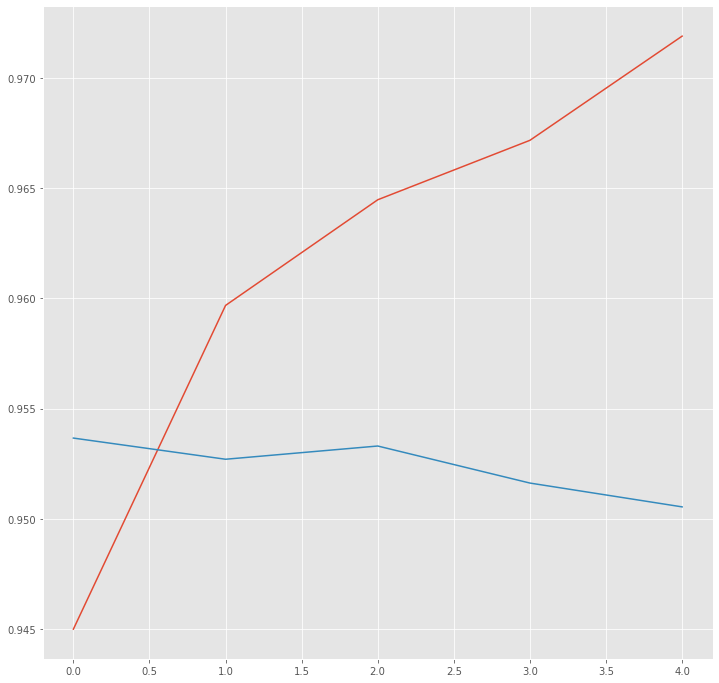

In [106]:
hist = pd.DataFrame(history.history)
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.show()


In [107]:
y_pred = model.predict(X_te_embeddings['elmo_representations'][1].detach().numpy(),verbose=1)

2081/2081 [==============================] - 0s 225us/step


In [108]:
y_pred[1]

array([[2.68502132e-04, 6.22079819e-02, 9.37523544e-01],
       [1.11416084e-04, 4.90422428e-01, 5.09466112e-01],
       [1.67923499e-04, 3.28259408e-01, 6.71572685e-01],
       [1.90019608e-04, 1.35564893e-01, 8.64245057e-01],
       [9.38728772e-05, 4.50312346e-02, 9.54874873e-01],
       [1.32623582e-05, 1.98687473e-03, 9.97999847e-01],
       [6.71169255e-05, 4.10191482e-03, 9.95830953e-01],
       [2.60606430e-05, 2.34394521e-03, 9.97630000e-01],
       [2.77724557e-05, 9.49554902e-04, 9.99022722e-01],
       [2.74390011e-04, 1.11270379e-02, 9.88598585e-01]], dtype=float32)

In [109]:
y_te[1]

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [110]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p, axis=-1)
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out
pred_labels = pred2label(y_pred)

def pred2labelV2(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p])
        out.append(out_i)
    return out
test_labels = pred2labelV2(y_te)

In [111]:
# i = 4
# p = np.argmax(y_pred[i], axis=-1)
# print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
# print(30 * "=")
# for w, t, pred in zip(X_tr_embeddings[i], y_te[i], p):
#     if w != 0:
#         print("{:15}: {:5} {}".format(w, t, pred))


In [112]:
y_pred[1]

array([[2.68502132e-04, 6.22079819e-02, 9.37523544e-01],
       [1.11416084e-04, 4.90422428e-01, 5.09466112e-01],
       [1.67923499e-04, 3.28259408e-01, 6.71572685e-01],
       [1.90019608e-04, 1.35564893e-01, 8.64245057e-01],
       [9.38728772e-05, 4.50312346e-02, 9.54874873e-01],
       [1.32623582e-05, 1.98687473e-03, 9.97999847e-01],
       [6.71169255e-05, 4.10191482e-03, 9.95830953e-01],
       [2.60606430e-05, 2.34394521e-03, 9.97630000e-01],
       [2.77724557e-05, 9.49554902e-04, 9.99022722e-01],
       [2.74390011e-04, 1.11270379e-02, 9.88598585e-01]], dtype=float32)

In [113]:
from  sklearn_crfsuite.metrics import flat_classification_report  
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)

              precision    recall  f1-score   support

           O       1.00      1.00      1.00      6511
      object       0.80      0.65      0.72      1827
        text       0.95      0.98      0.96     12472

    accuracy                           0.95     20810
   macro avg       0.92      0.88      0.89     20810
weighted avg       0.95      0.95      0.95     20810



In [114]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 71.5%


In [115]:
print(classification_report(test_labels, pred_labels))

           precision    recall  f1-score   support

     text       0.76      0.73      0.74      2705
   object       0.70      0.60      0.64      1081

micro avg       0.74      0.69      0.71      3786
macro avg       0.74      0.69      0.71      3786



In [5]:
# sentences = [['minu', 'nimi' ,'on', 'nesma', 'hästi', 'Eemaldatud', '700', 'ml', 'plasmat','RR',' 112/60',' mmHg'], ['Pt.', 'tehtud' ,'plasmaferees', 'talus', 'hästi']]
# character_ids = batch_to_ids(sentences)
# embeddings = elmo(character_ids)

In [6]:
# embeddings['elmo_representations'][1].shape

In [7]:
# embeddings['elmo_representations'][1][1][4].detach().numpy()

In [8]:
# scipy.spatial.distance.cosine(embeddings['elmo_representations'][1][1][4].detach().numpy(),embeddings['elmo_representations'][1][1][1].detach().numpy())